<a href="https://colab.research.google.com/github/Le-Zheng/analytics-zoo/blob/lenet_mnist_graph/docs/docs/colab-notebook/lenet_mnist_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


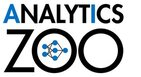
---

## **Environment Preparation**

**Install Java 8**

Run the command on the colaboratory file to install jdk 1.8:

In [1]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set jdk environment path which enables you to run Pyspark in your Colab environment.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

openjdk version "1.8.0_275"
OpenJDK Runtime Environment (build 1.8.0_275-8u275-b01-0ubuntu1~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.275-b01, mixed mode)


**Install Analytics Zoo from pip**

You can also install the pre-release build version through `!pip install --pre  analytics-zoo`. Or install a nigthtly-build [wheels](https://sourceforge.net/projects/analytics-zoo/files/zoo-py/) by `!pip install analytics_zoo-*-py2.py3-none-*_x86_64.whl`

In [ ]:
# Install latest release version of analytics-zoo 
# Installing analytics-zoo from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install analytics-zoo

In [ ]:
# Install required dependencies
!pip install tensorflow==1.15.0 tensorflow-probability==0.7.0 tensorflow-datasets==2.1.0

## **Distributed TensorFlow (v1.15) using Orca APIs**

This is an example to demonstrate how to use Analytics-Zoo's Orca TF Estimator API to run distributed Tensorflow and Keras on Spark. 

In this guide we will describe how to scale out TensorFlow (v1.15) programs using Orca in 4 simple steps.

In [4]:
# import necesary libraries and modules
import argparse

import tensorflow as tf
import tensorflow_datasets as tfds
from zoo.orca.learn.tf.estimator import Estimator
from zoo.orca import init_orca_context, stop_orca_context
from zoo.orca import OrcaContext

Prepending /usr/local/lib/python3.6/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Adding /usr/local/lib/python3.6/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.1-spark_2.4.3-0.9.0-jar-with-dependencies.jar to BIGDL_JARS
Prepending /usr/local/lib/python3.6/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path



### **Step 1: Init Orca Context**

In [5]:
OrcaContext.log_output = True # Whether to redirect Spark driver JVM's stdout and stderr to the current python process. This is useful when running Analytics Zoo in jupyter notebook. 

init_orca_context(cluster_mode="local", cores=4)
dataset_dir = "~/tensorflow_datasets"

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.6/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.6/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.1-spark_2.4.3-0.9.0-jar-with-dependencies.jar:/usr/local/lib/python3.6/dist-packages/bigdl/share/lib/bigdl-0.12.1-jar-with-dependencies.jar pyspark-shell 
2020-12-29 09:48:18 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/lib/python3.6/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.1-spark_2.4.3-0.9.0-jar-with-dependencies.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/lib/python3.6/dist-packages/pyspark/jars/slf4j-log4j12-1.7.16.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


cls.getname: com.intel.analytics.bigdl.python.api.Sample
BigDLBasePickler registering: bigdl.util.common  Sample
cls.getname: com.intel.analytics.bigdl.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.util.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.python.api.JTensor
BigDLBasePickler registering: bigdl.util.common  JTensor
cls.getname: com.intel.analytics.bigdl.python.api.JActivity
BigDLBasePickler registering: bigdl.util.common  JActivity
Successfully got a SparkContext



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

### **Step 2: Define the Model**

In [6]:
def accuracy(logits, labels):
    predictions = tf.argmax(logits, axis=1, output_type=labels.dtype)
    is_correct = tf.cast(tf.equal(predictions, labels), dtype=tf.float32)
    return tf.reduce_mean(is_correct)


def lenet(images):
    with tf.variable_scope('LeNet', [images]):
        net = tf.layers.conv2d(images, 32, (5, 5), activation=tf.nn.relu, name='conv1')
        net = tf.layers.max_pooling2d(net, (2, 2), 2, name='pool1')
        net = tf.layers.conv2d(net, 64, (5, 5), activation=tf.nn.relu, name='conv2')
        net = tf.layers.max_pooling2d(net, (2, 2), 2, name='pool2')
        net = tf.layers.flatten(net)
        net = tf.layers.dense(net, 1024, activation=tf.nn.relu, name='fc3')
        logits = tf.layers.dense(net, 10)
        return logits

# tensorflow inputs
images = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28, 1))
# tensorflow labels
labels = tf.placeholder(dtype=tf.int32, shape=(None,))

logits = lenet(images)

loss = tf.reduce_mean(tf.losses.sparse_softmax_cross_entropy(logits=logits, labels=labels))

acc = accuracy(logits, labels)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### **Step 3: Define Train Dataset**

In [7]:
# get DataSet
mnist_train = tfds.load(name="mnist", split="train", data_dir=dataset_dir)
mnist_test = tfds.load(name="mnist", split="test", data_dir=dataset_dir)

In [8]:
# preprocess data
def preprocess(data):
    data['image'] = tf.cast(data["image"], tf.float32) / 255.
    return data['image'], data['label']

mnist_train = mnist_train.map(preprocess)
mnist_test = mnist_test.map(preprocess)

### **Step 4: Fit with Orca Estimator**

*   First, create an Estimator



In [9]:
est = Estimator.from_graph(inputs=images,
                               outputs=logits,
                               labels=labels,
                               loss=loss,
                               optimizer=tf.train.AdamOptimizer(),
                               metrics={"acc": acc})

*   Next, fit and evaluate using the Estimator

In [ ]:
max_epoch = 5
est.fit(data=mnist_train,
            batch_size=320,
            epochs=max_epoch,
            validation_data=mnist_test,
            # tfds mnist only has one file and cannot be sharded on files,
            # falling back on sharding on records.
            auto_shard_files=False)

In [11]:
result = est.evaluate(mnist_test, auto_shard_files=False)
print(result)

est.save_tf_checkpoint("/tmp/lenet/model")

creating: createStatelessMetric
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


INFO:tensorflow:SavedModel written to: /tmp/tmp47xxxwyo/saved_model.pb


INFO:tensorflow:SavedModel written to: /tmp/tmp47xxxwyo/saved_model.pb


2020-12-29 09:55:25 WARN  TFNetForInference$:234 - Loading TensorFlow SavedModel: SavedModel tag is not defined, using <serve>


2020-12-29 09:55:25.912624: I tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /tmp/tmp47xxxwyo
2020-12-29 09:55:25.916887: I tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2020-12-29 09:55:25.923517: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2020-12-29 09:55:25.939800: I tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2020-12-29 09:55:26.020018: I tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 107388 microseconds.
[Stage 1904:==========================================>             (3 + 1) / 4]

{'acc': 0.9912999868392944}
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFDataDataset' object has no attribute 'name'
